# Intro 

Codes to make some simple plots out of the housekeeping ict files

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import Sp_parameters as Sp
from load_utils import mat2py_time, toutc, load_ict
from Sp_parameters import smooth

In [2]:
from linfit import linfit

In [3]:
%matplotlib notebook

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [4]:
fp ='C:/Users/sleblan2/Research/ORACLES/'

# Load some ict files

In [5]:
fname = 'Hskping_P3_20170809_R0.ict'

In [6]:
f = fp+'data_other_2017/'+fname

In [11]:
h = load_ict(f)

('Start_UTC', 'Day_Of_Year', 'Latitude', 'Longitude', 'MSL_GPS_Altitude', 'Pressure_Altitude', 'Radar_Altitude', 'Ground_Speed', 'True_Air_Speed', 'Indicated_Air_Speed', 'Mach_Number', 'Vertical_Speed', 'True_Heading', 'Track_Angle', 'Drift_Angle', 'Pitch_Angle', 'Roll_Angle', 'Static_Air_Temp', 'Potential_Temp', 'Dew_Point', 'Total_Air_Temp', 'IR_Surf_Temp', 'Static_Pressure', 'Cabin_Pressure', 'Wind_Speed', 'Wind_Direction', 'Solar_Zenith_Angle', 'Aircraft_Sun_Elevation', 'Sun_Azimuth', 'Aircraft_Sun_Azimuth', 'Mixing_Ratio', 'Part_Press_Water_Vapor', 'Sat_Vapor_Press_H2O', 'Sat_Vapor_Press_Ice', 'Relative_Humidity')


In [14]:
h.dtype.names

('Start_UTC',
 'Day_Of_Year',
 'Latitude',
 'Longitude',
 'MSL_GPS_Altitude',
 'Pressure_Altitude',
 'Radar_Altitude',
 'Ground_Speed',
 'True_Air_Speed',
 'Indicated_Air_Speed',
 'Mach_Number',
 'Vertical_Speed',
 'True_Heading',
 'Track_Angle',
 'Drift_Angle',
 'Pitch_Angle',
 'Roll_Angle',
 'Static_Air_Temp',
 'Potential_Temp',
 'Dew_Point',
 'Total_Air_Temp',
 'IR_Surf_Temp',
 'Static_Pressure',
 'Cabin_Pressure',
 'Wind_Speed',
 'Wind_Direction',
 'Solar_Zenith_Angle',
 'Aircraft_Sun_Elevation',
 'Sun_Azimuth',
 'Aircraft_Sun_Azimuth',
 'Mixing_Ratio',
 'Part_Press_Water_Vapor',
 'Sat_Vapor_Press_H2O',
 'Sat_Vapor_Press_Ice',
 'Relative_Humidity')

# Plot out some figures of altitudes and lat lon

<IPython.core.display.Javascript object>


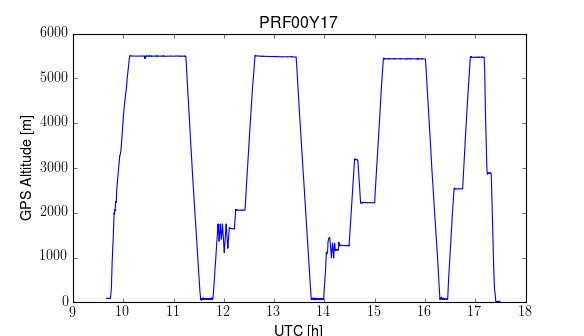

In [19]:
plt.figure()
plt.plot(h['Start_UTC'],h['MSL_GPS_Altitude'])
plt.xlabel('UTC [h]')
plt.ylabel('GPS Altitude [m]')
plt.title('PRF00Y17')
plt.savefig(fp+'plot/2017/20170809_PRF00Y17_alt.png',dpi=600,transparent=True)

In [47]:
kmh_2_knts = 1.94384449246 
base_speed = 110.0
speed_per_alt = 0.0075
alt = np.linspace(0,5500,55)

In [48]:
sp = (base_speed+alt*speed_per_alt)*kmh_2_knts

<IPython.core.display.Javascript object>


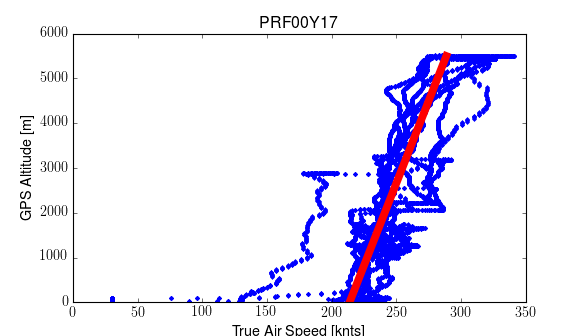

In [37]:
plt.figure()
plt.plot(h['True_Air_Speed'],h['MSL_GPS_Altitude'],'.')
plt.xlabel('True Air Speed [knts]')
plt.ylabel('GPS Altitude [m]')
plt.title('PRF00Y17')
plt.plot(sp,alt,'r',lw=7)
#plt.savefig(fp+'plot/2017/20170809_PRF00Y17_alt.png',dpi=600,transparent=True)

In [43]:
np.diff(h['MSL_GPS_Altitude'])>0

array([False, False, False, ..., False, False, False], dtype=bool)

<IPython.core.display.Javascript object>


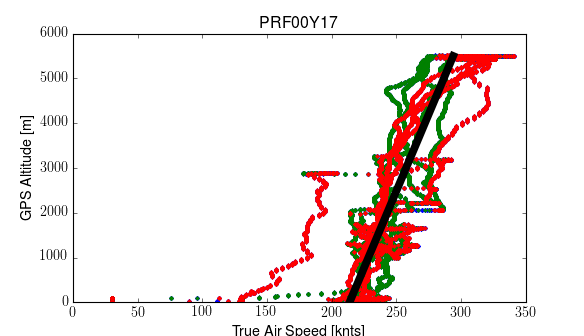

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 28141 but corresponding boolean dimension is 28140
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel_launcher.py:4: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 28141 but corresponding boolean dimension is 28140
  after removing the cwd from sys.path.


In [49]:
plt.figure()
plt.plot(h['True_Air_Speed'],h['MSL_GPS_Altitude'],'.')
plt.plot(h['True_Air_Speed'][np.diff(h['MSL_GPS_Altitude'])>0],h['MSL_GPS_Altitude'][np.diff(h['MSL_GPS_Altitude'])>0],'g.')
plt.plot(h['True_Air_Speed'][np.diff(h['MSL_GPS_Altitude'])<0],h['MSL_GPS_Altitude'][np.diff(h['MSL_GPS_Altitude'])<0],'r.')

plt.xlabel('True Air Speed [knts]')
plt.ylabel('GPS Altitude [m]')
plt.title('PRF00Y17')
plt.plot(sp,alt,'k',lw=7)

<IPython.core.display.Javascript object>


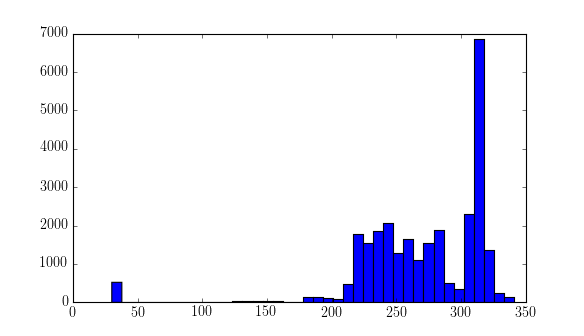

(array([  5.23000000e+02,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   6.00000000e+00,
          0.00000000e+00,   6.00000000e+00,   6.00000000e+00,
          0.00000000e+00,   1.00000000e+01,   6.00000000e+00,
          2.90000000e+01,   2.80000000e+01,   4.00000000e+01,
          2.80000000e+01,   4.00000000e+01,   1.70000000e+01,
          2.20000000e+01,   1.36000000e+02,   1.53000000e+02,
          1.24000000e+02,   8.50000000e+01,   4.74000000e+02,
          1.78000000e+03,   1.55800000e+03,   1.86600000e+03,
          2.05500000e+03,   1.27600000e+03,   1.64700000e+03,
          1.09600000e+03,   1.53900000e+03,   1.88000000e+03,
          5.02000000e+02,   3.37000000e+02,   2.29800000e+03,
          6.85100000e+03,   1.35600000e+03,   2.32000000e+02,
          1.35000000e+02]),
 array([  30.   ,   37.775,   45.55 ,   53.325,   61.1  ,   68.875,
          76.65 ,   84.425,   92.2  ,   99.975,  107.75 ,  115.525,
         123.3  ,  131.075,  1

In [40]:
plt.figure()
plt.hist(h['True_Air_Speed'],bins=40)